## Beer Analysis
---

Notebook to get insights from the dataset for beers, breweries and reviews.

The dataset came in 3 different CSV files: beers.csv, breweries.csv and reviews.csv that has around 9 Million reviews!

#### Data Source: [Kaggle](https://www.kaggle.com/ehallmar/beers-breweries-and-beer-reviews#reviews.csv)

The data comes from [BeerAdvocate](https://www.beeradvocate.com)

In [30]:
# Dependencies and packages
%reload_ext lab_black

import os
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import plotly
import plotly.express as px

In [32]:
csv_path = os.path.join("../data/csv/beers.csv")
df_beers = pd.read_csv(csv_path)

df_beers.head()

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,No notes at this time.,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,No notes at this time.,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,No notes at this time.,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,Every time this year,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,No notes at this time.,f


In [17]:
df_beers = df_beers.drop(["notes"], axis=1)
df_beers.head()

,id,name,brewery_id,state,country,style,availability,abv,retired
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,7.3,f
1,82352,Konrads Stout Russian Imperial Stout,18604,NaN,NO,Russian Imperial Stout,Rotating,10.4,f
2,214879,Scottish Right,44306,IN,US,Scottish Ale,Year-round,4.0,t
3,320009,MegaMeow Imperial Stout,4378,WA,US,American Imperial Stout,Winter,8.7,f
4,246438,Peaches-N-Cream,44617,PA,US,American Cream Ale,Rotating,5.1,f


In [33]:
csv_path2 = os.path.join("../data/csv/breweries.csv")
df_breweries = pd.read_csv(csv_path2)

df_breweries.head()

,id,name,city,state,country,notes,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,No notes at this time.,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,No notes at this time.,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,No notes at this time.,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,No notes at this time.,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,Duplicate of https://www.beeradvocate.com/beer...,"Bar, Eatery"


In [19]:
df_breweries = df_breweries.drop(["notes"], axis=1)
df_breweries.head()

,id,name,city,state,country,types
0,19730,Brouwerij Danny,Erpe-Mere,NaN,BE,Brewery
1,32541,Coachella Valley Brewing Co,Thousand Palms,CA,US,"Brewery, Bar, Beer-to-go"
2,44736,Beef 'O' Brady's,Plant City,FL,US,"Bar, Eatery"
3,23372,Broadway Wine Merchant,Oklahoma City,OK,US,Store
4,35328,Brighton Beer Dispensary (DUPLICATE),Brighton,GB2,GB,"Bar, Eatery"


In [34]:
csv_path3 = os.path.join("../data/csv/reviews.csv")
df_reviews = pd.read_csv(csv_path3)

In [21]:
df_reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


In [22]:
df_reviews.shape

(9073128, 10)

In [23]:
df_beers.shape

(358873, 9)

In [24]:
df_breweries.shape

(50347, 6)

In [25]:
# Find the number of unique beers in reviews.csv
df_reviews["beer_id"].value_counts()

11757     17160
2093      15947
7971      14927
1093      14915
29619     14292
          ...  
203777        1
126326        1
109950        1
282050        1
8188          1
Name: beer_id, Length: 309542, dtype: int64

In [26]:
# Find unique users who reviewed
df_reviews["username"].value_counts()

Sammy              13798
kylehay2004        12221
acurtis            12016
StonedTrippin      11859
jaydoc             11800
                   ...  
Grapeson               1
Steven_Salminen        1
Ashley_nicole0         1
Markkleeb              1
heykev                 1
Name: username, Length: 164934, dtype: int64

In [11]:
# Find unique value counts for every column in beers.csv
df_beers.apply(lambda x: x.isnull().value_counts())

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
False,358873.0,358873.0,358873.0,298147,358719,358872,358873.0,320076,358827,358873.0
True,NaN,NaN,NaN,60726,154,1,NaN,38797,46,NaN


In [12]:
# Find value counts for every column in breweries.csv
df_breweries.apply(lambda x: x.isnull().value_counts())

,id,name,city,state,country,notes,types
False,50347.0,50347.0,50289,39076,50341,50262,50347.0
True,NaN,NaN,58,11271,6,85,NaN


In [13]:
# Find value counts for every column in reviews.csv
df_reviews.apply(lambda x: x.isnull().value_counts())

,beer_id,username,date,text,look,smell,taste,feel,overall,score
False,9073128.0,9069313,9073128.0,9073128.0,5283110,5283110,5283110,5283110,5283110,9073128.0
True,NaN,3815,NaN,NaN,3790018,3790018,3790018,3790018,3790018,NaN


### Number of Breweries per Country

In [14]:
df_breweries["country"].value_counts()

US    34693
GB     2525
CA     1890
DE     1812
BE      756
      ...  
TO        1
ST        1
PK        1
HT        1
FM        1
Name: country, Length: 199, dtype: int64

In [15]:
# Number of unique countries
df_breweries["country"].nunique()

199

**Next Steps:**
- Drop all the reviews that are below 4 and store in another DF

- Drop column `'text'` - we dont need detailed review of the user.

- Drop columns `look`, `smell`, `taste`, `feel` and `overall` ??

In [16]:
df_reviews2 = df_reviews.copy()

In [17]:
df_reviews2.drop(df_reviews2[df_reviews2["score"] < 4].index, inplace=True)

In [18]:
df_reviews2.shape

(4785625, 10)

In [19]:
df_reviews2 = df_reviews2.drop(["text"], axis=1)

In [20]:
df_reviews2

,beer_id,username,date,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,4.25,4.50,4.25,4.25,4.25,4.31
...,...,...,...,...,...,...,...,...,...
9073123,104824,CTJman,2014-06-08,NaN,NaN,NaN,NaN,NaN,4.00
9073124,104824,IMSPEAKNOENGLISH,2014-06-06,NaN,NaN,NaN,NaN,NaN,5.00
9073125,104824,twizzard,2014-06-05,NaN,NaN,NaN,NaN,NaN,5.00
9073126,104824,bootdown21,2014-06-04,NaN,NaN,NaN,NaN,NaN,4.50


In [ ]:
# Drop unwanted rows

### Can't wait to start Visualizations

In [48]:
state_counts = pd.DataFrame(
    df_breweries["state"].value_counts().rename_axis("state").reset_index(name="counts")
)

In [21]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers
pio.renderers.default = "jupyterlab"

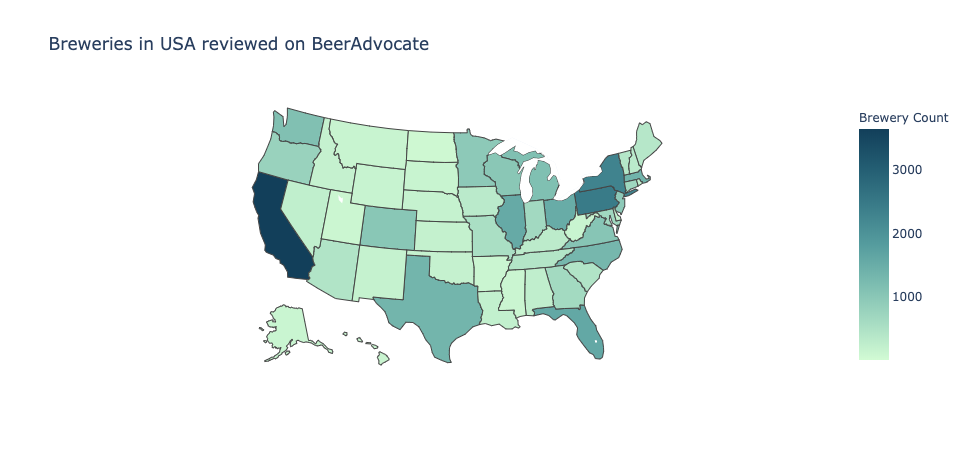

In [57]:
fig = go.Figure(
    data=go.Choropleth(
        locations=state_counts["state"],  # Spatial coordinates
        z=state_counts["counts"].astype(float),  # Data to be color-coded
        locationmode="USA-states",  # set of locations match entries in `locations`
        colorscale="Darkmint",
        colorbar_title="Brewery Count",
    )
)

fig.update_layout(
    title_text="Breweries in USA reviewed on BeerAdvocate",
    geo_scope="usa",  # limite map scope to USA
)

fig.show()

In [56]:
state_counts.head(5)

,state,counts
0,CA,3638
1,PA,2454
2,NY,2284
3,GB2,2152
4,FL,1595


In [ ]:
df2.drop(df2[df2["review_overall"] < 4].index, inplace=True)